In [1]:
import sys 
sys.path.append("D:\\GitHub\\Clone\\planning\\ruixuan")
from turning_scene import *
from l5kit.rasterization.rasterizer_builder import _load_metadata
import time
import pickle

D:\Anaconda\lib\site-packages\l5kit\dataset\select_agents.py:31: UserWarning: Windows detected. BLOSC_NOLOCK has not been set as it causes memory leaks on Windows.However, writing the mask with this config may be inconsistent.
  "Windows detected. BLOSC_NOLOCK has not been set as it causes memory leaks on Windows."


In [3]:
# set env variable for data
os.environ["L5KIT_DATA_FOLDER"] = "C:\\Users\\zheng\\Desktop\\UMich\\Independent Study\\prediction-dataset"
# get config
cfg = load_config_data("C:\\Users\\zheng\\Desktop\\UMich\\Independent Study\\Codes\\python codes\\visualisation_config.yaml")
print(cfg)

dm = LocalDataManager()
dataset_path = dm.require(cfg["val_data_loader"]["key"])
zarr_dataset = ChunkedDataset(dataset_path)
zarr_dataset.open()
print(zarr_dataset)

rast = build_rasterizer(cfg, dm)
ego_dataset = EgoDataset(cfg, zarr_dataset, rast)
# agent_dataset = AgentDataset(cfg, zarr_dataset, rast)
# Obatin the information from semantic map

semantic_map_filepath = dm.require(cfg["raster_params"]["semantic_map_key"])
dataset_meta = _load_metadata(cfg["raster_params"]["dataset_meta_key"], dm)
world_to_ecef = np.array(dataset_meta["world_to_ecef"], dtype=np.float64)
Map_Api = MapAPI(semantic_map_filepath, world_to_ecef)

{'format_version': 4, 'model_params': {'model_architecture': 'resnet50', 'history_num_frames': 0, 'future_num_frames': 50, 'step_time': 0.1}, 'raster_params': {'raster_size': [300, 300], 'pixel_size': [0.5, 0.5], 'ego_center': [0.6, 0.5], 'map_type': 'py_semantic', 'satellite_map_key': 'aerial_map/aerial_map.png', 'semantic_map_key': 'semantic_map/semantic_map.pb', 'dataset_meta_key': 'meta.json', 'filter_agents_threshold': 0.5, 'disable_traffic_light_faces': False, 'set_origin_to_bottom': True}, 'val_data_loader': {'key': 'scenes/train.zarr', 'batch_size': 12, 'shuffle': False, 'num_workers': 16}}
+------------+------------+------------+---------------+-----------------+----------------------+----------------------+----------------------+---------------------+
| Num Scenes | Num Frames | Num Agents | Num TR lights | Total Time (hr) | Avg Frames per Scene | Avg Agents per Frame | Avg Scene Time (sec) | Avg Frame frequency |
+------------+------------+------------+---------------+------

In [235]:
cd lane_merge

D:\GitHub\Clone\planning\ruixuan\target_scene_index\lane_merge


In [236]:
junction_lane_merge = np.load('scene_index(lane_merge)_Pedestrian.npy',allow_pickle = True)

In [7]:
junction_8KfB = np.load('scene_index(8KfB)_Pedestrian.npy',allow_pickle = True)

In [88]:
AV_state = {}
for scene in junction_lane_merge:
    AV_state[scene] = {}
    frame_interval = zarr_dataset.scenes[scene]['frame_index_interval']
    data = zarr_dataset.frames[frame_interval[0]:frame_interval[1]-1]
    AV_state[scene]['translation'] = data['ego_translation'][:,:2]
    time_step = data['timestamp']
    time_diff = np.diff(time_step)[:,None]/1e9
    AV_state[scene]['velocity'] = np.diff(AV_state[scene]['translation'], axis=0)/time_diff
    AV_state[scene]['acceleration'] = np.diff(AV_state[scene]['velocity'], axis=0)/time_diff[1:]
    rotation = data['ego_rotation']
    AV_state[scene]['yaw'] = [rotation33_as_yaw(r) for r in rotation]

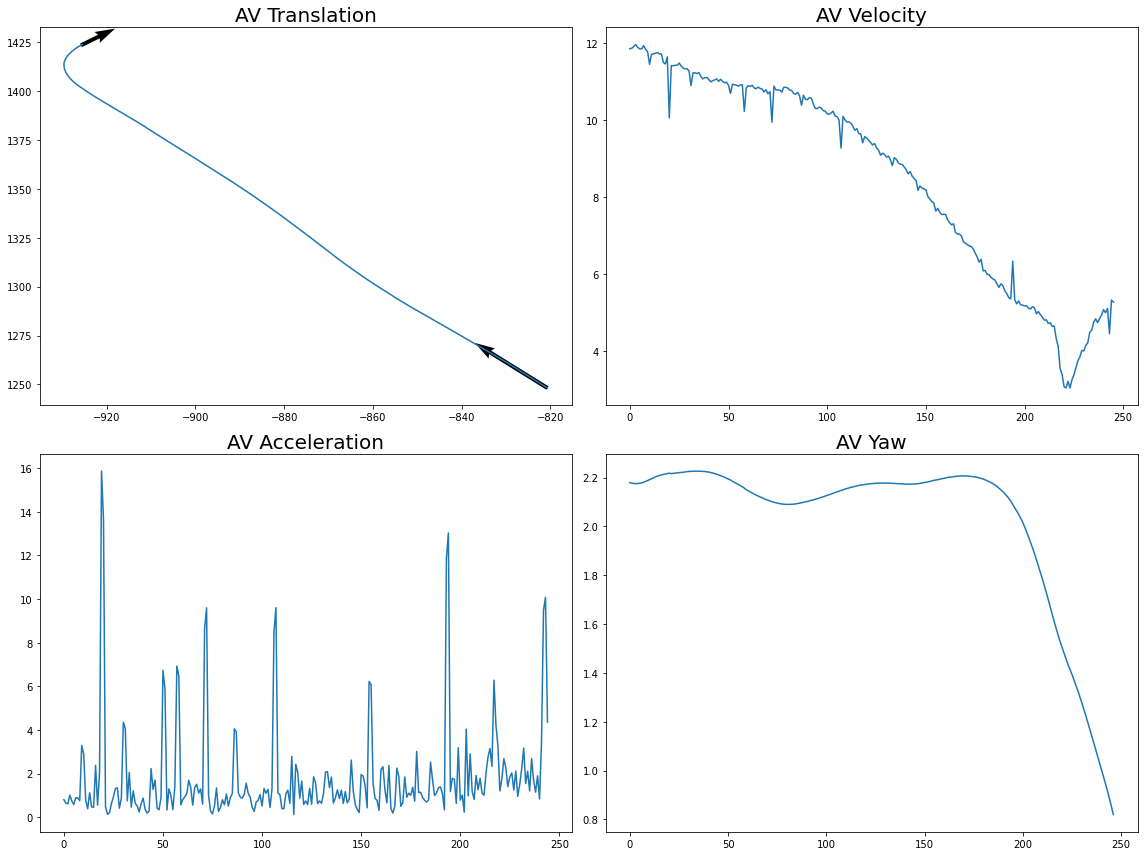

In [93]:
def AV_state_plot(data):

    figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,12))

    x = data['translation'][:,0]
    y = data['translation'][:,1]
    axes[0, 0].quiver(x[[0,-2]], y[[0,-2]], x[[1,-1]]-x[[0,-2]], y[[1,-1]]-y[[0,-2]], scale_units='inches', angles='xy', scale=1)
    axes[0, 0].plot(x, y)
    axes[0, 1].plot(range(data['velocity'].shape[0]), np.linalg.norm(data['velocity'],axis=1))
    axes[1, 0].plot(range(data['acceleration'].shape[0]), np.linalg.norm(data['acceleration'],axis=1))
    axes[1, 1].plot(range(len(data['yaw'])), data['yaw'])

    axes[0, 0].set_title("AV Translation", fontsize = 20)
    axes[0, 1].set_title("AV Velocity", fontsize = 20)
    axes[1, 0].set_title("AV Acceleration", fontsize = 20)
    axes[1, 1].set_title("AV Yaw", fontsize = 20)

    figure.tight_layout()
    
    
    
AV_state_plot(AV_state[23])

In [8]:
junction_8KfB

array([   82,   347,   380,   924,   978,  1041,  1274,  1571,  1656,
        1861,  2024,  2046,  2097,  2148,  2208,  2209,  2387,  2582,
        2725,  2838,  3080,  3134,  3193,  3435,  3470,  3518,  3608,
        3609,  3657,  3658,  3716,  3774,  3775,  3873,  4990,  5021,
        5022,  5081,  5082,  5366,  5367,  5423,  5532,  5582,  5781,
        5844,  5900,  5958,  6014,  6095,  6328,  6409,  6472,  6730,
        6731,  7032,  7033,  7092,  7154,  7192,  7244,  7356,  7411,
        7463,  7485,  7539,  7639,  7641,  7828,  7920,  7980,  8071,
        8121,  8170,  8328,  8434,  8486,  8538,  8952,  9006,  9063,
        9115,  9211,  9250,  9351, 10106, 10292, 10446, 10949, 11177,
       11233, 11462, 11593, 11639, 11691, 11859, 11971, 12034, 12160,
       12284, 12606, 12926, 12980, 13043, 13066, 13390, 13448, 13449,
       13544, 13597, 13712, 13811, 13812, 13916, 13965, 14013, 14168,
       14221, 14275, 14371, 14423, 14670, 14726, 14776, 14823, 14881,
       14934, 15023,

In [237]:
# define the meta parameters
time_step_num = 10
step_size = 5
label = ['Not_Set', 'Unknown', 'Dont_Care','Car','Van','Tram','Bus','Truck','EV','OV','Bicycle','Motorcycle','Cyclist','Motorcyclist','Pedestrian', 'Animal', 'AV_Dont_Care']

"""
junction_8KfB_agent_state = {}

for scene in tqdm(junction_8KfB):

    frame_interval = zarr_dataset.scenes[scene]['frame_index_interval']
    checking_frame_list = list(range(frame_interval[0],frame_interval[1],5))+[frame_interval[1]-1]
    checking_frame_list_len = len(checking_frame_list)

    scene_agent_state = {frame:{} for frame in checking_frame_list}

    for frame in checking_frame_list:

        scene_agent_state[frame] = current_frame_agent_state(frame, frame_interval, label, zarr_dataset, time_step_num, step_size)
        
        
    junction_8KfB_agent_state[scene] = scene_agent_state
    
"""

junction_lane_merge_agent_state = {}

for scene in tqdm(junction_lane_merge):

    frame_interval = zarr_dataset.scenes[scene]['frame_index_interval']
    checking_frame_list = list(range(frame_interval[0],frame_interval[1],5))+[frame_interval[1]-1]
    checking_frame_list_len = len(checking_frame_list)

    scene_agent_state = {frame:{} for frame in checking_frame_list}

    for frame in checking_frame_list:

        scene_agent_state[frame] = current_frame_agent_state(frame, frame_interval, label, zarr_dataset, time_step_num, step_size)
        
        
    junction_lane_merge_agent_state[scene] = scene_agent_state

100%|██████████████████████████████████████████████████████████████████████████████████████| 166/166 [1:24:51<00:00, 30.67s/it]


In [238]:
np.save('Agent_state.npy',junction_lane_merge_agent_state)

In [239]:
output = open('Agent_state.pickle', 'wb')

# Pickle dictionary using protocol 0.
pickle.dump(junction_lane_merge_agent_state, output)

In [213]:
def current_frame_agent_state(frame, frame_interval, label, zarr_dataset, time_step_num, step_size):
    
    agent_state = {LABEL:{} for LABEL in label}
    
    diff_frame_front = frame - frame_interval[0]
    diff_frame_back = frame_interval[1] - frame
    scene_len = frame_interval[1] - frame_interval[0]

    current_agent_index = zarr_dataset.frames[frame]['agent_index_interval']
    current_agent = zarr_dataset.agents[current_agent_index[0]:current_agent_index[1]]
    curremt_agent_label_prob = current_agent['label_probabilities']

    current_agent = current_agent[(curremt_agent_label_prob[:,:3].sum(axis=1)+curremt_agent_label_prob[:,-1]) != 1]
    current_agent_id = current_agent['track_id']
    curremt_agent_label_prob = current_agent['label_probabilities']

    if diff_frame_front < 50:

        for idx, agent in enumerate(current_agent_id):
            agent_label = label[np.argmax(curremt_agent_label_prob[idx])]
            history_translation = np.full([10,2], None)
            future_translation = np.full([10,2], None)
            history_yaw = np.full([10], None)
            future_yaw = np.full([10], None)

            count = diff_frame_front//5 + 1
            history_frame_list = checking_frame_list[:count]
            future_frame_list = checking_frame_list[count:count+10]

            history_count = -len(history_frame_list)
            future_count = 0

            for history_frame in history_frame_list:

                history_agent_index = zarr_dataset.frames[history_frame]['agent_index_interval']
                history_agent = zarr_dataset.agents[history_agent_index[0]:history_agent_index[1]]
                target_agent_frame_bool = (history_agent['track_id']==agent)

                if True in target_agent_frame_bool:

                    history_agent_centroid = history_agent['centroid'][target_agent_frame_bool]
                    history_agent_yaw = history_agent['yaw'][target_agent_frame_bool]
                    history_translation[history_count,:] = history_agent_centroid
                    history_yaw[history_count] = history_agent_yaw[0]

                history_count += 1


            for future_frame in future_frame_list:
                future_agent_index = zarr_dataset.frames[future_frame]['agent_index_interval']
                future_agent = zarr_dataset.agents[future_agent_index[0]:future_agent_index[1]]
                target_agent_frame_bool = (future_agent['track_id']==agent)

                if True in target_agent_frame_bool:

                    future_agent_centroid = future_agent['centroid'][target_agent_frame_bool]
                    future_agent_yaw = future_agent['yaw'][target_agent_frame_bool]
                    future_translation[future_count,:] = future_agent_centroid
                    future_yaw[future_count] = future_agent_yaw[0]

                future_count += 1

            agent_state[agent_label][agent] = {}
            agent_state[agent_label][agent]['history_translation'] = history_translation
            agent_state[agent_label][agent]['future_translation'] = future_translation
            agent_state[agent_label][agent]['history_yaw'] = history_yaw
            agent_state[agent_label][agent]['future_yaw'] = future_yaw

    elif diff_frame_back < 50:

        for idx, agent in enumerate(current_agent_id):
            agent_label = label[np.argmax(curremt_agent_label_prob[idx])]
            history_translation = np.full([10,2], None)
            future_translation = np.full([10,2], None)
            history_yaw = np.full([10], None)
            future_yaw = np.full([10], None)

            count = diff_frame_back//5 + 1
            history_frame_list = checking_frame_list[checking_frame_list_len-count-10:checking_frame_list_len-count]
            future_frame_list = checking_frame_list[checking_frame_list_len-count:]

            history_count = 0
            future_count = 0

            for history_frame in history_frame_list:

                history_agent_index = zarr_dataset.frames[history_frame]['agent_index_interval']
                history_agent = zarr_dataset.agents[history_agent_index[0]:history_agent_index[1]]
                target_agent_frame_bool = (history_agent['track_id']==agent)

                if True in target_agent_frame_bool:

                    history_agent_centroid = history_agent['centroid'][target_agent_frame_bool]
                    history_agent_yaw = history_agent['yaw'][target_agent_frame_bool]
                    history_translation[history_count,:] = history_agent_centroid
                    history_yaw[history_count] = history_agent_yaw[0]

                history_count += 1


            for future_frame in future_frame_list:
                future_agent_index = zarr_dataset.frames[future_frame]['agent_index_interval']
                future_agent = zarr_dataset.agents[future_agent_index[0]:future_agent_index[1]]
                target_agent_frame_bool = (future_agent['track_id']==agent)

                if True in target_agent_frame_bool:

                    future_agent_centroid = future_agent['centroid'][target_agent_frame_bool]
                    future_agent_yaw = future_agent['yaw'][target_agent_frame_bool]
                    future_translation[future_count,:] = future_agent_centroid
                    future_yaw[future_count] = future_agent_yaw[0]

                future_count += 1

            agent_state[agent_label][agent] = {}
            agent_state[agent_label][agent]['history_translation'] = history_translation
            agent_state[agent_label][agent]['future_translation'] = future_translation
            agent_state[agent_label][agent]['history_yaw'] = history_yaw
            agent_state[agent_label][agent]['future_yaw'] = future_yaw


    else:

        for idx, agent in enumerate(current_agent_id):
            agent_label = label[np.argmax(curremt_agent_label_prob[idx])]
            history_translation = np.full([10,2], None)
            future_translation = np.full([10,2], None)
            history_yaw = np.full([10], None)
            future_yaw = np.full([10], None)

            count = diff_frame_front//5 + 1
            history_frame_list = checking_frame_list[count-10:count]
            future_frame_list = checking_frame_list[count:count+10]

            history_count = 0
            future_count = 0

            for history_frame in history_frame_list:

                history_agent_index = zarr_dataset.frames[history_frame]['agent_index_interval']
                history_agent = zarr_dataset.agents[history_agent_index[0]:history_agent_index[1]]
                target_agent_frame_bool = (history_agent['track_id']==agent)
                
                if True in target_agent_frame_bool:

                    history_agent_centroid = history_agent['centroid'][target_agent_frame_bool]
                    history_agent_yaw = history_agent['yaw'][target_agent_frame_bool]
                    history_translation[history_count,:] = history_agent_centroid
                    history_yaw[history_count] = history_agent_yaw[0]

                history_count += 1


            for future_frame in future_frame_list:
                future_agent_index = zarr_dataset.frames[future_frame]['agent_index_interval']
                future_agent = zarr_dataset.agents[future_agent_index[0]:future_agent_index[1]]
                target_agent_frame_bool = (future_agent['track_id']==agent)

                if True in target_agent_frame_bool:

                    future_agent_centroid = future_agent['centroid'][target_agent_frame_bool]
                    future_agent_yaw = future_agent['yaw'][target_agent_frame_bool]
                    future_translation[future_count,:] = future_agent_centroid
                    future_yaw[future_count] = future_agent_yaw[0]

                future_count += 1

            agent_state[agent_label][agent] = {}
            agent_state[agent_label][agent]['history_translation'] = history_translation
            agent_state[agent_label][agent]['future_translation'] = future_translation
            agent_state[agent_label][agent]['history_yaw'] = history_yaw
            agent_state[agent_label][agent]['future_yaw'] = future_yaw
        
        
    return agent_state